In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('healthcare-dataset-stroke-data.csv')
dataset.head()
dataset.count()

id                   5110
gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
Residence_type       5110
avg_glucose_level    5110
bmi                  4909
smoking_status       5110
stroke               5110
dtype: int64

In [3]:
#data pre-processing
df = dataset.copy()
df = df.dropna()
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


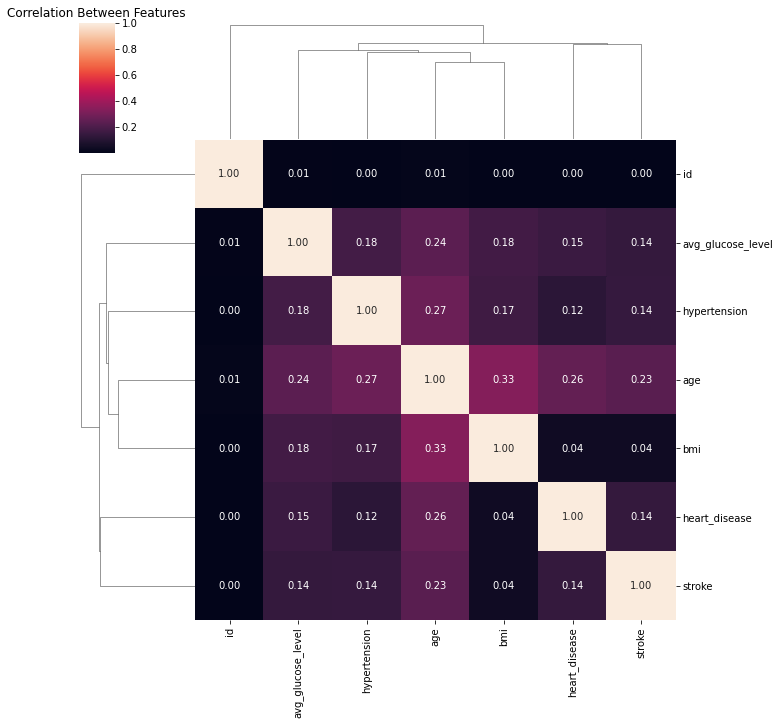

In [5]:
#correlation matrix
corr_data = df.corr()
sns.clustermap(corr_data,annot= True,fmt = '.2f')
plt.title('Correlation Between Features')
plt.show();

In [6]:
#dependent variable
df["stroke"].value_counts() 

0    4700
1     209
Name: stroke, dtype: int64

In [54]:
column = df["age"]
max_value = column.max()
print(max_value)

82.0


In [55]:
column = df["age"]
min_value = column.min()
print(min_value)

0.08


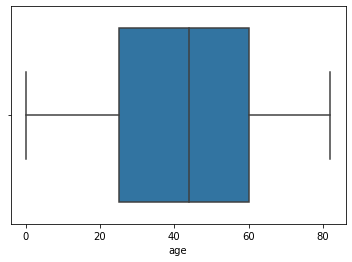

In [53]:
sns.boxplot(x=df["age"])

Text(0.5, 0, 'Ever Married')

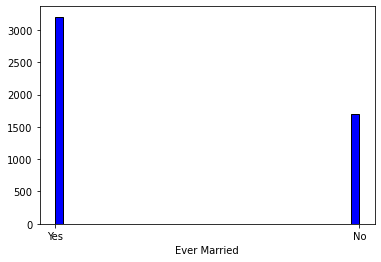

In [56]:
plt.hist(df['ever_married'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))
plt.xlabel("Ever Married")

Text(0.5, 0, 'Work Type')

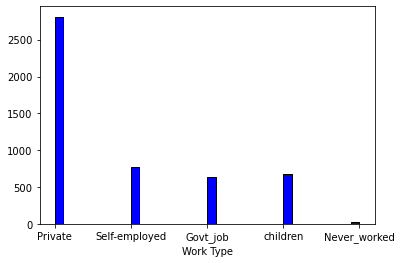

In [57]:
plt.hist(df['work_type'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))
plt.xlabel("Work Type")

Text(0.5, 0, 'Residence Type')

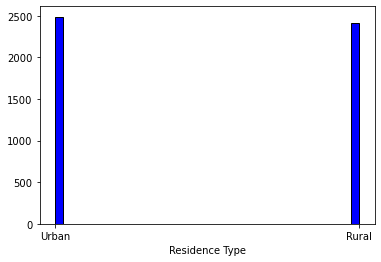

In [58]:
plt.hist(df['Residence_type'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))
plt.xlabel("Residence Type")

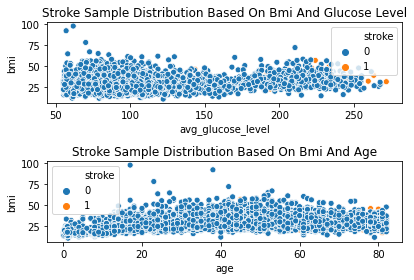

In [59]:
plt.subplot(2,1,1)
plt.title('Stroke Sample Distribution Based On Bmi And Glucose Level')
sns.scatterplot(x=df['avg_glucose_level'],y=df['bmi'],hue=df['stroke'])
plt.subplot(2,1,2)
plt.title('Stroke Sample Distribution Based On Bmi And Age')
sns.scatterplot(x=df['age'],y=df['bmi'],hue=df['stroke'])
plt.tight_layout()
plt.show()

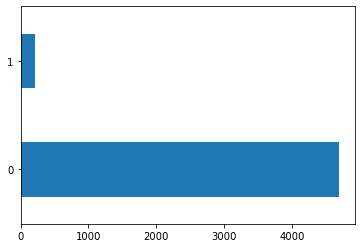

In [7]:
df["stroke"].value_counts().plot.barh();

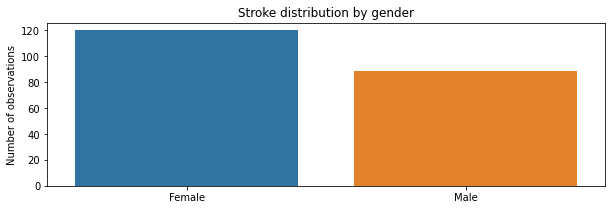

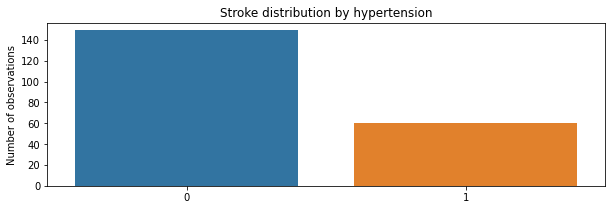

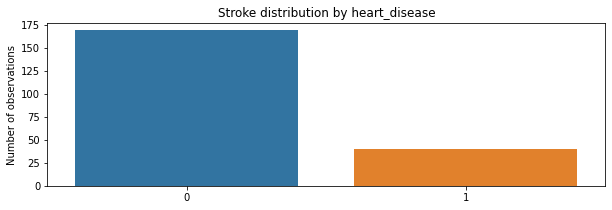

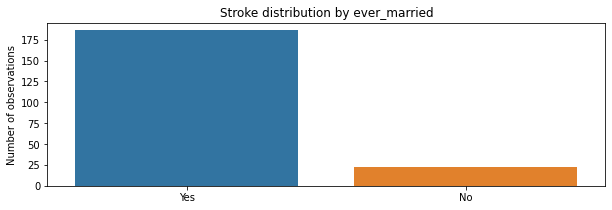

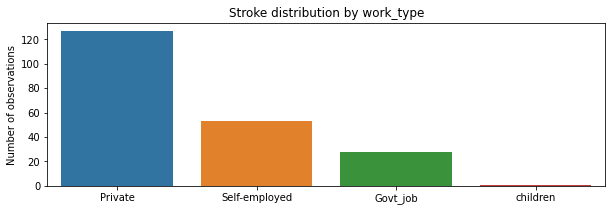

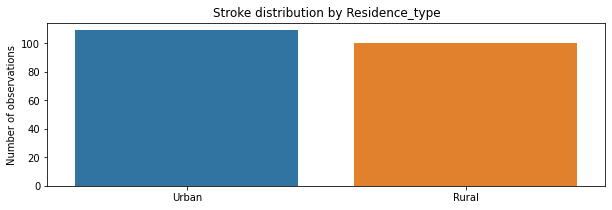

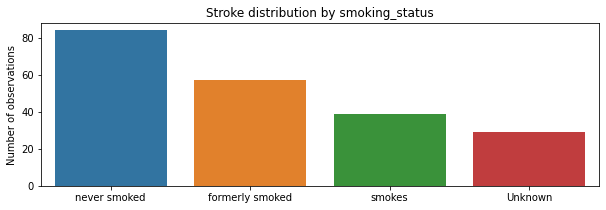

In [8]:
categorical=['gender','hypertension','heart_disease','ever_married',
             'work_type','Residence_type','smoking_status']
for x in categorical:
    cat=df[df['stroke']==1][x]
    fig,n=plt.subplots(figsize=(10,3))
    g=sns.barplot(x=cat.value_counts().index,y=cat.value_counts())
    g.set_title(f'Stroke distribution by {x}')
    g.set_ylabel('Number of observations')

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,4909.0,37064.313506,20995.098457,77.00,18605.00,37608.00,55220.00,72940.00
age,4909.0,42.865374,22.555115,0.08,25.00,44.00,60.00,82.00
hypertension,4909.0,0.091872,0.288875,0.00,0.00,0.00,0.00,1.00
heart_disease,4909.0,0.049501,0.216934,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,4909.0,105.305150,44.424341,55.12,77.07,91.68,113.57,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.50,28.10,33.10,97.60
stroke,4909.0,0.042575,0.201917,0.00,0.00,0.00,0.00,1.00


In [10]:
#pre-processing for training & test dataset 
y = df["stroke"] 
X = df.drop(["stroke"], axis=1)

In [11]:
X['gender'] = [1 if i.strip() == 'Male' else 0 for i in X.gender]
X['ever_married'] = [1 if i.strip() == 'Yes' else 0 for i in X.ever_married]
X['Residence_type'] = [1 if i.strip() == 'Urban' else 0 for i in X.Residence_type]

X = X.drop(["work_type"], axis=1)
X = X.drop(["smoking_status"], axis=1)
X = X.drop(["id"], axis=1)

In [12]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi
0,1,67.0,0,1,1,1,228.69,36.6
2,1,80.0,0,1,1,0,105.92,32.5
3,0,49.0,0,0,1,1,171.23,34.4
4,0,79.0,1,0,1,0,174.12,24.0
5,1,81.0,0,0,1,1,186.21,29.0


In [13]:
##Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(solver='liblinear')

In [15]:
loj_model.intercept_

array([-6.09686694])

In [16]:
loj_model.coef_

array([[-0.04146034,  0.05775778,  0.58157429,  0.43625099, -0.2162901 ,
        -0.03805457,  0.00449818, -0.02120715]])

In [17]:
y_pred = loj_model.predict(X)
confusion_matrix(y, y_pred)

array([[4700,    0],
       [ 209,    0]], dtype=int64)

In [18]:
accuracy_score(y, y_pred)

0.9574251375025463

In [19]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4700
           1       0.00      0.00      0.00       209

    accuracy                           0.96      4909
   macro avg       0.48      0.50      0.49      4909
weighted avg       0.92      0.96      0.94      4909



In [20]:
#ROC Curve

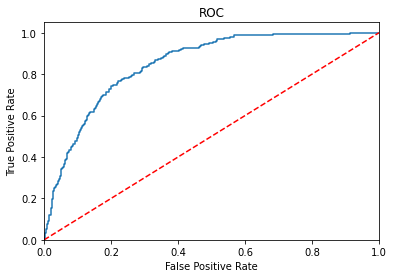

In [21]:
loj_model.predict_proba(X)[:,1][0:5]

logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [22]:
# train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)

In [23]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

testscore_lr =accuracy_score(y_test, loj_model.predict(X_test))
accuracy_score(y_test, loj_model.predict(X_test)) 

0.9511201629327902

In [24]:
crosscore_lr =cross_val_score(loj_model, X_test, y_test, cv = 10).mean() 
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.9504550468836183

In [25]:
##Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

y_pred = nb_model.predict(X_test)
testscore_nb =   accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.869653767820774

In [27]:
crosscore_nb=cross_val_score(nb_model, X_test, y_test, cv = 10).mean() 
cross_val_score(nb_model, X_test, y_test, cv = 10).mean() 

0.8730465159036587

In [28]:
##KNN

In [29]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

y_pred = knn_model.predict(X_test)

testscore_knn =accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.9477257298031229

In [30]:
#model tuning
knn_params = {"n_neighbors": np.arange(1,50)}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [31]:
print("The best score:" + str(knn_cv.best_score_))
print("The best parameters: " + str(knn_cv.best_params_))

The best score:0.9601295003051055
The best parameters: {'n_neighbors': 12}


In [32]:
knn = KNeighborsClassifier(12)
knn_tuned = knn.fit(X_train, y_train)
knn_tuned.score(X_test, y_test)

0.9511201629327902

In [33]:
y_pred = knn_tuned.predict(X_test)
crosscore_knn=accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.9511201629327902

In [34]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

testscore_svm=accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.9511201629327902

In [35]:
#model tuning
svc_params = {"C": np.arange(1,5)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 32.1min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 38.2min finished


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4])}, verbose=2)

In [36]:
print("The best parameter: " + str(svc_cv_model.best_params_))

The best parameter: {'C': 1}


In [37]:
svc_tuned = SVC(kernel = "linear", C = 1).fit(X_train, y_train)

In [38]:
y_pred = svc_tuned.predict(X_test)
crosscore_svm=accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.9511201629327902

In [39]:
##Decision Tree Classifier

In [40]:
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [41]:
y_pred = cart_model.predict(X_test)
testscore_cart=accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.9131025118805159

In [42]:
#model tunning
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

print("The best parameter: " + str(cart_cv_model.best_params_))


Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1012 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 2636 tasks      | elapsed:   18.4s


The best parameter: {'max_depth': 1, 'min_samples_split': 2}


[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:   32.6s finished


In [43]:
cart = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 19)
cart_tuned = cart.fit(X_train, y_train)

y_pred = cart_tuned.predict(X_test)
crosscore_cart=accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.9490835030549898

In [44]:
##Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
testscore_rf=accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.9511201629327902

In [46]:
#model tuning
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

rf_cv_model.fit(X_train, y_train)
print("The best parameter: " + str(rf_cv_model.best_params_))

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 166 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 369 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 652 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 1017 tasks      | elapsed: 23.8min


The best parameter: {'max_depth': 2, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 10}


[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 26.3min finished


In [47]:
rf_tuned = RandomForestClassifier(max_depth = 5, 
                                  max_features = 2, 
                                  min_samples_split = 5,
                                  n_estimators = 5)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=2, min_samples_split=5,
                       n_estimators=5)

In [48]:
y_pred = rf_tuned.predict(X_test)
crosscore_rf=accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.9511201629327902

Text(0.5, 0, 'Importance Level of Features ')

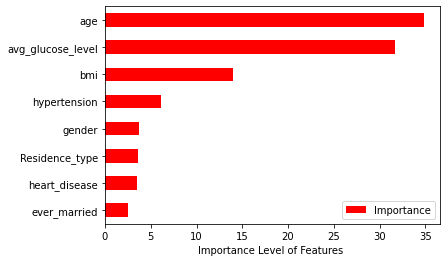

In [49]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Importance Level of Features ")

In [50]:
#Results

In [51]:
modeller = [
    knn_tuned,
    loj_model,
    svc_tuned,
    nb_model,
    cart_tuned,
    rf_tuned
]


for model in modeller:
    item = model.__class__.__name__
    y_pred = model.predict(X_test)
    a_score = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(item + ":" )
    print("Accuracy: {:.4%}".format(a_score))

----------------------------
KNeighborsClassifier:
Accuracy: 95.1120%
----------------------------
LogisticRegression:
Accuracy: 95.1120%
----------------------------
SVC:
Accuracy: 95.1120%
----------------------------
GaussianNB:
Accuracy: 86.9654%
----------------------------
DecisionTreeClassifier:
Accuracy: 94.9084%
----------------------------
RandomForestClassifier:
Accuracy: 95.1120%


In [52]:
modeller_name=['LR','NB','KNN','SVC','CART','RF']
model_Test=[testscore_lr,testscore_nb,testscore_knn,testscore_svm,testscore_cart,testscore_rf]
model_Cross=[crosscore_lr,crosscore_nb,crosscore_knn,crosscore_svm,crosscore_cart,crosscore_rf]

#creating line1
line1= go.Scatter(
    x = modeller_name, # x axis
    y = model_Test, # y axis
    mode = "markers", #type of plot
    name = "Test Scores", # name of the plots
    marker = dict(color = 'rgba(167,150,55,0.8)'), #color + opacity
    text = modeller_name # hover text
)

#creating line2
line2= go.Scatter(
    x = modeller_name,
    y = model_Cross,
    mode = 'lines+markers',
    name = "Cross Valid Scores",
    marker = dict(color = 'rgba(95,26,80,0.8)'),
    text = modeller_name
)

data = [line1,line2]

layout= dict(title= 'Comparison of Test & Cross Validation Scores',              
             xaxis= dict(title= 'ML Methods',ticklen= 5,zeroline= False)
)
fig = dict(data = data, layout = layout)
iplot(fig)